In [0]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Input,Lambda ,Layer,Dense,Flatten,Dropout,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical as catg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
! git clone https://github.com/sonusingh43/Number-Classifications

fatal: destination path 'Number-Classifications' already exists and is not an empty directory.


In [0]:
img_width, img_height = 32, 32
train_data=pd.read_csv("/content/Number-Classifications/Images/train.csv")
test_data=pd.read_csv("/content/Number-Classifications/Images/Test.csv")

In [28]:
train_data.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [64]:
train_data['label'].unique()

array([4, 9, 1, 7, 3, 2, 6, 0, 8, 5])

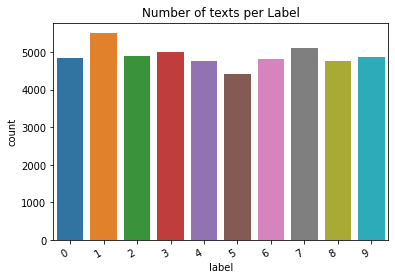

In [68]:
chart = sns.countplot(train_data.label)
plt.title("Number of texts per Label")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [29]:
test_data.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [0]:
#Get the path of the images
from os.path import join
train_paths='/content/Number-Classifications/Images/train'
#val_paths='Images/val'
filenames=train_data['filename'].tolist()
img_paths = [join(train_paths, filename) for filename in filenames]

In [39]:
img_paths

['/content/Number-Classifications/Images/train/0.png',
 '/content/Number-Classifications/Images/train/1.png',
 '/content/Number-Classifications/Images/train/2.png',
 '/content/Number-Classifications/Images/train/3.png',
 '/content/Number-Classifications/Images/train/4.png',
 '/content/Number-Classifications/Images/train/5.png',
 '/content/Number-Classifications/Images/train/6.png',
 '/content/Number-Classifications/Images/train/7.png',
 '/content/Number-Classifications/Images/train/8.png',
 '/content/Number-Classifications/Images/train/9.png',
 '/content/Number-Classifications/Images/train/10.png',
 '/content/Number-Classifications/Images/train/11.png',
 '/content/Number-Classifications/Images/train/12.png',
 '/content/Number-Classifications/Images/train/13.png',
 '/content/Number-Classifications/Images/train/14.png',
 '/content/Number-Classifications/Images/train/15.png',
 '/content/Number-Classifications/Images/train/16.png',
 '/content/Number-Classifications/Images/train/17.png',
 '

In [0]:
y=catg(train_data['label'],10)

In [33]:
type(y)

numpy.ndarray

In [34]:
y.shape

(49000, 10)

In [35]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
#imgs
img_array = np.array([img_to_array(img) for img in imgs])
x = preprocess_input(img_array)

In [49]:

x.shape


(49000, 32, 32, 3)

In [0]:
#Keras layers
model= Sequential()
model.add(Conv2D(20,kernel_size=(3,3),activation='relu',input_shape=(img_width,img_height,3)))
model.add(Dropout(0.2))
model.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128))

#model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 20)        560       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 20)        3620      
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 20)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 13520)            

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
model.fit(x,y,batch_size=32,epochs=5,validation_split=0.2)


Epoch 1/5
1225/1225 [==============================] - 139s 113ms/step - loss: 10.4759 - accuracy: 0.8591 - val_loss: 0.1384 - val_accuracy: 0.9596
Epoch 2/5
1225/1225 [==============================] - 138s 112ms/step - loss: 0.1668 - accuracy: 0.9539 - val_loss: 0.1048 - val_accuracy: 0.9692
Epoch 3/5
1225/1225 [==============================] - 140s 114ms/step - loss: 0.1260 - accuracy: 0.9640 - val_loss: 0.0888 - val_accuracy: 0.9737
Epoch 4/5
1225/1225 [==============================] - 138s 113ms/step - loss: 0.1095 - accuracy: 0.9683 - val_loss: 0.0911 - val_accuracy: 0.9737
Epoch 5/5
1225/1225 [==============================] - 138s 113ms/step - loss: 0.1006 - accuracy: 0.9703 - val_loss: 0.1043 - val_accuracy: 0.9692


In [0]:
train_paths='/content/Number-Classifications/Images/test'
filenames=test_data['filename'].tolist()
test_img_paths = [join(train_paths, filename) for filename in filenames]


In [0]:
imgs = [load_img(test_img_path, target_size=(img_height, img_width)) for test_img_path in test_img_paths]
#imgs
img_array = np.array([img_to_array(img) for img in imgs])
x_test = preprocess_input(img_array)

In [72]:
predicted=model.predict(x_test)
predicted

array([[1.77186799e-09, 1.77507820e-09, 1.80513506e-08, ...,
        1.19457937e-07, 4.01403258e-06, 1.45239283e-05],
       [9.64878261e-01, 1.45784952e-06, 3.40361260e-02, ...,
        5.13121195e-05, 9.84892133e-04, 7.90333161e-06],
       [9.95291863e-04, 2.48595242e-08, 2.10841885e-03, ...,
        4.28418294e-02, 1.06927335e-04, 9.36747134e-01],
       ...,
       [9.46742948e-05, 2.22219517e-11, 3.47014613e-08, ...,
        7.05392342e-11, 1.98415291e-04, 8.73713134e-07],
       [4.49066846e-08, 2.34250362e-11, 1.02592445e-07, ...,
        1.89570887e-10, 2.01523130e-06, 3.29445871e-09],
       [4.23228613e-07, 3.70833355e-08, 9.99805152e-01, ...,
        1.45209483e-10, 4.31674613e-10, 4.78672268e-10]], dtype=float32)

In [73]:
predictions=np.argmax(predicted,axis=1)
predictions


array([4, 0, 9, ..., 6, 6, 2])

In [81]:
np.argmax(4.23228613e-07)

0

In [0]:
test_data.to_csv("Submission.csv",columns=['filename'],index=False)

In [0]:
test_data['label']=predictions


In [0]:
test_data.to_csv("Submission.csv",columns=['filename','label'],index=False)

In [119]:
from google.colab import files
uploaded = files.upload()

Saving t6.jpg to t6.jpg


The Letter/Number is :  6


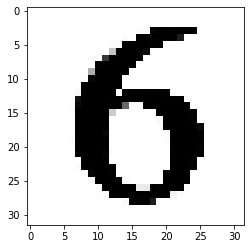

In [122]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Number-Classifications/Selftest/t6.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
#img = img/255.0

img = img.reshape(1, img_width, img_height, 3)
#classes = bridge_df.columns[2:]
#data.columns
#print(classes)
y_prob = model.predict(img)

result = y_prob[0]
#print("result is",result)
  #print(result)
  #Food', 'misc', 'Attire', 'Decorationandsignage'
answer = np.argmax(result)
print("The Letter/Number is : ",answer)